In [2]:
import rmnn as rm
import collections
import numpy as np

parameters = collections.OrderedDict()
parameters['siren_1']=[2,256,1,4]
parameters['splitsiren_1']=[2,256,[10,10],4,'tucker']
#net='mulsiren',parameters=[2,256,[10,10],4,'tucker']
net = rm.represent.get_nn(net='composition',parameters=parameters)
data = np.random.random((2,3))
mask = np.zeros((2,3))
mask[0,2] = 1
data_train_loader,data_val_loader,data_test_loader = rm.toolbox.get_dataloader(x_mode='inr',batch_size=128,shuffle_if=False,data=data,mask=mask,xrange=1)

#print(net.G)

epoch  0 , loss =  0.62090516
epoch  30 , loss =  0.07509176
epoch  60 , loss =  0.042660587
epoch  90 , loss =  0.039292876
epoch  120 , loss =  0.03892245
epoch  150 , loss =  0.038695708
epoch  180 , loss =  0.038513362
epoch  210 , loss =  0.03834617
epoch  240 , loss =  0.03818201
epoch  270 , loss =  0.038017035
MSE= 0.03785202941894531


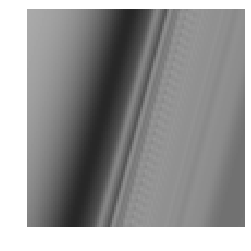

In [4]:
import rmnn as rm
import numpy as np
import collections

data = rm.toolbox.load_data('./data/img/Cameraman.jpg',data_type='gray_img',data_shape=(100,100))
mask = rm.toolbox.load_mask(mask_type='random',random_rate=0.0,mask_path=None,data_shape=data.shape,mask_shape='same')
data_in = rm.toolbox.get_dataloader(x_mode='inr',batch_size=240**2,shuffle_if=False,data=data,mask=mask,xrange=1)
# net = rm.represent.net(device='cpu',fid_name='mse',net_name='increase_tanh',parameters=[2,256,1,4],opt_name='Adam',lr=1e-3)

parameters = collections.OrderedDict()
parameters['increase_tanh 0']=[2,2,2,3]
#parameters['norm 0']=[1]
parameters['inr_siren 1']=[2,256,1,4]
net = rm.represent.net(device='cpu',fid_name='mse',net_name='composition',parameters=parameters,opt_name='Adam',lr=1e-3)


# data_in = rm.toolbox.get_dataloader(x_mode='splitinr',batch_size=240**2,shuffle_if=False,data=data,mask=mask,xrange=1)
# net = rm.represent.net(device=0,fid_name='mse',net_name='splitsiren',parameters=[3,256,[100,100,3],4,'tucker'],opt_name='Adam',lr=1e-3)

net.fit(data_in,epoch=300,verbose=True)
net.test(data_in,data_shape=(100,100),show_if=True)

In [4]:
from scipy import io
import rmnn as rm
data_all =["C://Users//jamily//Desktop//LRTFR_Code//plane"] # video data.
for data in data_all:
    file_name = data+'p3.mat'
    mat = io.loadmat(file_name)
    X_np = mat["Nhsi"][:,:,:]
    print(X_np.shape)
rm.toolbox.save_data(data_path='./data/numpy/vid6mask.npy',data_type='numpy',data=X_np)

(144, 176, 100)


In [7]:
import open3d as o3d
import numpy as np
pcd = o3d.io.read_point_cloud("C://Users//jamily//Desktop//LRTFR_Code//heartp0.05.pcd")
X_np = point = np.array(pcd.points)[:,:]
print(X_np.shape)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
(299, 3)
